Written by Dr. Hoda Mirafzal, Dr. Grace Stokes, and Dr. Megan Tichy

## Upon completion of this exercise, students should be able to: 
*   Assess integrated rate law plots to determine the order of a reaction with respect to a specific reactant
*   Predict the half-life of first or second order decay reaction from concentration/time data
*   Visualize the differences between 1st and 2nd order kinetic rate laws using Python graphics
*   Discriminate which theoretical model best matches experimental data

##**Before starting this excercise, make a copy of this file (Go to File > Save a copy in Drive). Rename the copy with YOUR (student's) name (not your instructor's name). Make sure to share the file with your instructor and TA.**

# Python Basics
In this exercise, we will use Python code to visualize how the concentration of a reactant changes as a function of time depending on the reaction order. **You don't have to know any python or any programming to go through this exercise,** but if you'd like to learn more, see this website: https://blogs.scu.edu/stokeslab/learning-python-in-general-chemistry/

Helpful hints:

*   Hashtags (<i>#</i>) at the beginning of a line signify comments and get color-coded as green but do not impact the execution of the code.
*   The notebook only executes the current code block. This can have several unintended consequences. If you change a value and then go back and run an earlier code block, it will use the new value, not the first defined value, which may give you incorrect analysis. 
*   Similarly, if you open your notebook later, or try to run a code block after having changed something in an earlier block, you should go through every cell and hit "shift-enter" until you get to the cell where you want to see your updated results.


## STEP 1. IMPORT LIBRARIES
The first step in any python exercise is to bring in (or import) the libraries for numerical operations and graphics. That's what the next cell does. 
Click in the box, then press Shift and Enter at the same time.</br>

In [ ]:
# Execute this cell with shift-enter or by left-clicking the "play button" to the left. 
# This cell imports various libraries and packages that we will need

# numpy is used for numerical operations
import numpy as np

# matplotlib.pyplot is used for graphics
import matplotlib.pyplot as plt

# We will use pandas to make data tables
import pandas as pd

print('You did it! Libraries are now imported.')

# Kinetics of Triclosan Removal by Activated Charcoal

Triclosan is an antimicrobial and antifungal agent that is used in many beauty supplies, soaps, and toothpaste. High levels of triclosan in the environment have raised concern about our constant exposure to the drug. One of the methods available to remove triclosan from contaminated waste water is to use activated charcoal as an adsorbent.

The kinetics of stoichiometrically simple reactions can be described using what is called the **<i>order</i>** of a reaction.

For the general reaction $ A \longrightarrow products $, described by the rate law $ rate =k[A]^n$, the reaction is $ n^{th} $ order with respect to the reactant $ A $. We will use the data you collected in lab to investigate the order of the reaction between triclosan and activated charcoal. 

## STEP 2. IMPORT DATA INTO TABLE
Next, let's create a table with the data you have collected in the lab. In the cell below, you will enter the ticlosan concentration values for all of the aliquots you collected.
  

<p>In the cell below, <b>time_min_exp</b> stands for the points in time (in units of minutes) when you took an aliquot from your triclosan solution. You were asked to take aliquots about every ten minutes. Change the values for <b>time_min_exp</b> to the correct time values at which you took each aliquot. 

<p><b>triclosan_conc_ppm_exp</b> stands for the concentration of each triclosan aliquot in units of ppm. Change the values to reflect the triclosan concentrations of your experimental aliquots. Remember that you have to use the calibration curve you constructed to convert the absorbance value for each aliquot to a concentration value in units of ppm. Do NOT change anything else in the code. When done, execute the cell by shift+enter. </p>



In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# In the command below, we input the times (in minutes) when we collect each data point.
# In python, arrays are data structures like lists. In this case, you want to make a list of numbers that represents the times at which you collected data.
# The function np.array allows you to input values that you type directly into a list.
# In Python, brackets are used to index a set of numbers into an array.
# Later in the code, instead of asking python to perform calculations with each individual data point, we simply ask it to perform the calculation on the array and it automatically applies the calculation to all numbers in the array.
time_min_exp = np.array([0.0,10.0,20.0,30.0,40.0,50.0,60.0])
      
# In the command below, we input the triclosan concentrations (in ppm) for each of collected aliquots.
triclosan_conc_ppm_exp = np.array([23.00,15.00,12.00,7.00,6.00,5.50,5.00])

print('Great! You have successfully entered your data.')


Now that you've entered your experimental data, python will summarize your data in a table. It is critical that you ensure that the generated table agrees with the experimental data that you collected in the lab. The rest of the code will calculate everything based on the data in this table.

In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# Generate a table using the data inputted above
# Create an empty dataframe
df = pd.DataFrame()
# Add data to the dataframe
df['time (min)'] = time_min_exp
df['experimental [triclosan] (ppm)'] = triclosan_conc_ppm_exp

# This command makes the table in this cell
df

# Part 1: Determing the Reaction Order by Using Integrated Rate Law Plots

Recall that the integrated rate law for each common type of reaction (zeroth, first, or second order with respect to a single reactant $A$) can be plotted to obtain a straight line. 

For a zeroth order reaction, a plot of concentration of reactant $A$ versus time yields a straight line with a slope = $-k$. 
<p style='text-align: right;'>
$ [A] = -kt+[A]_0$
$\qquad\qquad\qquad\qquad\qquad\qquad$  (zeroth-order Integrated Rate Law) 
</p>

For a first order reaction, a plot of natural log of concentration ($ln[A]$) versus time yields a straight line with a slope = $-k$. 
<p style='text-align: right;'>
$ ln[A] = -kt+ln[A]_0$
$\qquad\qquad\qquad\qquad\qquad\qquad$  (1st-order Integrated Rate Law) 
</p>

And for a second order reaction, a plot of inverse concentration ($\dfrac{1}{[A]}$) versus time yields a straight line with a slope = $k$. 
<p style='text-align: right;'>
$ \frac{1}{[A]} = kt+ \frac{1}{[A]_0}$
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ (2nd-order Integrated Rate Law)
</p>

Using these plots offers a graphical method to determine the reaction order with respect to a specific reactant. In our case, we are interested to determine the order of the reaction with respect to triclosan. The cell below will generate the three integrated rate law plots for your data.

In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.
# The following calculates the natural log and inverse of each of the experimental concentrations.
ln_triclosan_conc = np.log(triclosan_conc_ppm_exp)
inv_triclosan_conc = 1/triclosan_conc_ppm_exp

# This initializes the plot windows in a side-by-side view
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,5))

# The following import a module that allows us to get statistical information (such as R^2, standard deviation, ...) on the trendlines.
from scipy import stats

# This plots triclosan_conc_ppm_exp (independent variable) as a function of time_min_exp (dependent variable) and it labels the figure and the axes.
# 'ro' means red circles. If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing
ax1.plot(time_min_exp,triclosan_conc_ppm_exp,'ro')
slope, intercept, r_value, p_value, std_err = stats.linregress(time_min_exp,triclosan_conc_ppm_exp)
ax1.set_title('Figure 1. Experimental Triclosan Concentration versus Time \n y={:4.2e} x + {:4.2E}; R^2= {:2.2f}'.format(slope,intercept, r_value*r_value))
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('[Triclosan] (ppm)')
ax1.grid(True)
# The commands below fit a linear trendline to the graph.
z1 = np.polyfit(time_min_exp, triclosan_conc_ppm_exp, 1)
p1 = np.poly1d(z1)
ax1.plot(time_min_exp,p1(time_min_exp),"r--")

# This plots natural log of triclosan concentration as a function of time_min_exp and it labels the figure and the axes.
# 'bo' means blue circles. If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing
ax2.plot(time_min_exp,ln_triclosan_conc,'bo')
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(time_min_exp,ln_triclosan_conc)
ax2.set_title('Figure 2. Natural Log of Triclosan Concentration versus Time \n y={:4.2e} x + {:4.2E}; R^2= {:2.2f}'.format(slope2,intercept2, r_value2*r_value2))
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('ln[Triclosan]')
ax2.grid(True)
# The commands below fit a linear trendline to the graph.
z2 = np.polyfit(time_min_exp, ln_triclosan_conc, 1)
p2 = np.poly1d(z2)
ax2.plot(time_min_exp,p2(time_min_exp),"b--")

# This plots inverse triclosan concentration as a function of time_min_exp and it labels the figure and the axes.
# 'go' means green circles. If you would like to change the color of your markers, use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing
ax3.plot(time_min_exp,inv_triclosan_conc,'go')
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(time_min_exp,inv_triclosan_conc)
ax3.set_title('Figure 3. Inverse of Triclosan Concentration versus Time \n y={:4.2e} x + {:4.2E}; R^2= {:2.2f}'.format(slope3,intercept3, r_value3*r_value3))
ax3.set_xlabel('Time (min)')
ax3.set_ylabel('1/[Triclosan]')
ax3.grid(True)
# The commands below fit a linear trendline to the graph.
z3 = np.polyfit(time_min_exp, inv_triclosan_conc, 1)
p3 = np.poly1d(z3)
ax3.plot(time_min_exp,p3(time_min_exp),"g--")

# This command saves a snapshot of your figures in the current Google Drive folder. You may access it by clicking the folder icon on the left vertical menu bar.
fig.tight_layout() # to avoid overlapping
plt.savefig('Integrated_Rate_Law_Plots.png', bbox_inches='tight')

## In Your Notebook:

Take a screenshot of the three graphs python generated and paste it in the Results section of your notebook. Make sure to record the following in the Observations section:

* According to the graphs you generated, which is most likely the order of the reaction with respect to triclosan (zeroth, first, or second)? Justify your response. 
* The value of the rate constant ($k$) from the slope of the graph that best represents the order of the reaction. Don't forget the units!

# Part 2: Determining the Reaction Order by Estimating the Half-life

## Predicting Half-life from Experimental Data
Were you able to determine the order of the reaction definitively from Part 1? You may have been able to easily eliminate zeroth order but, perhaps, you need a little more information before you can determine the order with confidence. An alternative method of determining the order of the reaction is to have the Python code calculate theoretical concentration values for a zeroth, first, and second order reaction. The code can do this calculation if an estimated half-life is provided. A comparison between the experimental and theoretical concentration graphs allows you to which order is closest to your experimental data. If you were able to definitively determine the reaction order in Part 1 based on integrated rate law plots, this part will just serve as a confirmation. If your plots in Part 1 were not conclusive, this part will help you decide the correct reaction order.

This time, we will work with a set of experimental data that was provided to us:

Table 1. Experimentally Measured Triclosan Concentrations Versus Time
<p></p>
<p></p>

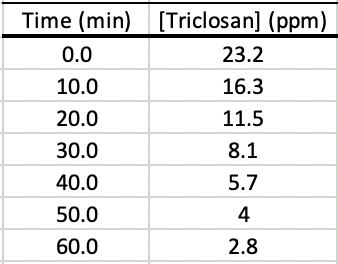


Look carefully at the above experimental data and estimate the half life ($t_\frac{1}{2}$). As a reminder, the $t_\frac{1}{2}$ is the time (in minutes) that it takes for the concentration to drop to half of its initial value. Write your answer in your lab notebook. </br>

<p>In the cell below, <b>half_life_min</b> stands for the value of the half-life of the reaction in units of minutes. Change the value for <b>half_life_min</b> to what you have estimated the half-life to be. The correct value should NOT be 90. Then, execute the cell by shift+enter. Write your estimated value of the half-life in your notebook. </p>



In [ ]:
# Execute this cell with shift-enter or by left-clicking the "play button" to the left. 
# We include the units in the variable name to avoid a syntax error. 
half_life_min = 90
print('half life =',half_life_min,'min')

##Calculating Triclosan Concentrations Based on 1st and 2nd Order Rate Laws

In lab, Triclosan concentration, [$triclosan$], was measured about every $10.0 mins$ over a 60 minute timespan. Our goal is to calculate the theoretical values for [$triclosan$] (ppm) at each time interval and compare the theoretical value to the provided measured value.

In the following cell, python will use the estimated value of half-life that you inputted in the previous cell to determine the corresponding 1st and 2nd order rate constants ($k_1$ and $k_2$) by using the following equations:

<p style='text-align: right;'>
$k_1 = \dfrac{ln(2)}{t_\frac{1}{2}}$  
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ (1st-order Half-life Equation)  
<br>

<p style='text-align: right;'>
$k_2 = \dfrac{1}{t_\frac{1}{2}[A]_0}$  
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$   (2nd-order Half-life Equation)   
<br>

In the above equations, $[A]_0$ stands for the initial concentration of the reactant, in this case triclosan. 
The code will then calculate and print the theoretical triclosan concentration at each time interval by using the integrated rate laws for 1st and 2nd order reactions:

<p style='text-align: right;'>
$ [A] = [A]_0e^{-k_1t}$
$\qquad\qquad\qquad\qquad\qquad\qquad$  (1st-order Integrated Rate Law) 
</p>

<p style='text-align: right;'>
$ [A] =( \frac{1}{[A]_0}+k_2t)^{-1}$
$\qquad\qquad\qquad\qquad\qquad$ (2nd-order Integrated Rate Law)
</p>



In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# We define initial_triclosan_conc_ppm from the concentration of the stock triclosan solution that was provided to you in the lab (concentration value at t=0 min)
initial_triclosan_conc_ppm = 23.2
print('Initial triclosan conc =',initial_triclosan_conc_ppm,'ppm')

# In the command below, we input the times (in minutes) from Table 1.
time_min_exp_table1 = np.array([0.0,10.0,20.0,30.0,40.0,50.0,60.0])
      
# In the command below, we input the triclosan concentrations (in ppm) for each of collected aliquots.
triclosan_conc_ppm_exp_table1 = np.array([23.2,16.3,11.5,8.1,5.7,4.0,2.8])

# 1st order rate law
# Here is where we calculate ln2 and plug into the 1st-order half-life equation to get k1
x=np.log(2)
print(f'Half-life = {half_life_min} minutes')
k1= x / half_life_min
# recall that the units of k1 is min^-1
print(f'The first order rate constant (k1)={k1:.5} min^-1.')
# In the numpy library, exponentials are denoted as exp(...) so for example, exp(5) = e^5.
# This line of code generates the triclosan concentration data for a 1st order reaction
triclosan_1st_order_ppm=initial_triclosan_conc_ppm*np.exp(-k1*time_min_exp_table1)

# 2nd order rate law
# recall that the units of k2 is ppm^-1 min^-1
k2=1/(half_life_min*initial_triclosan_conc_ppm)
print(f'The second order rate constant (k2) is {k2:.5} ppm^-1 min^-1.')
# Here we predict the triclosan concentration data if it was a 2nd order reaction
# Note that ** means raised to the power of (In Python, ax^3 can be written as a*x**3)
triclosan_2nd_order_ppm=(((1/(initial_triclosan_conc_ppm))+k2*time_min_exp_table1))**(-1)

# Input the data generated above into a table
# Create an empty dataframe
df = pd.DataFrame()
# Add data to the dataframe
df['time (min)'] = time_min_exp
df['exp[triclosan](ppm)'] = triclosan_conc_ppm_exp_table1
df['theor[triclosan]-1st'] = triclosan_1st_order_ppm
df['theor[triclosan]-2nd'] = triclosan_2nd_order_ppm

# This command makes the table in this cell
df

## In Your Notebook:

Take a screenshot of the table python generated and paste it in the Results section of your notebook. Make sure to record the following in the Observations section:

* The value of the 1st-order rate constant.
* The value of the 2nd-order rate constant.
* According to the table you generated, which theoretical reaction order (1st order rate law or 2nd order rate law) is closer to the experimentally-determined values for triclosan removal?

## Comparing the Plots of Experimental Data to Theoretical 1st and 2nd Order Rate Laws

You may have noticed that the comparison of the tabulated experimental triclosan concentrations with the tabulated theoretical triclosan concentrations was not very conclusive. As you'll soon see, plotting the data will make the comparison a lot more obvious. In the next cell, we will overlay our theoretical values from the 1st and 2nd order rate laws on a graph WITH the experimental data. We will call this graph Figure 4. 

In [ ]:
# Execute this cell with shift-enter or by clicking the "play button" to the left.

# This code below generates 50 evenly-spaced points between 0 and 60 minutes
time_min_theor=np.linspace(0,60)

#recall that init_triclosan_conc_ppm, k1 and k2 were previously defined so we do not need to re-define it 
# (unless we want to change the value for half-life)
triclosan_theor_1st_ppm= initial_triclosan_conc_ppm*np.exp(-k1*time_min_theor)
triclosan_theor_2nd_ppm=(((1/(initial_triclosan_conc_ppm))+k2*time_min_theor))**(-1)

# This initializes the plot window
plt.figure()

# This plots triclosan_conc_ppm_exp (independent variable) as a function of the experimental times (time_min_exp)
plt.title('Figure 4. Theoretical versus Experimental Triclosan Concentrations')
plt.xlabel('Time (min)')
plt.ylabel('Triclosan (ppm)')
plt.grid(True)

# These commands plot experimental data on the same graph as theoretical values for 1st order and 2nd order reactions.
# 'ro' means red circles, 'b-' means blue line and 'g.' means green dots 
# If you would like to change the color of your markers, 
# use this list of abbreviations: https://docs.google.com/document/d/1AC4tEjAnqF-qclPq9FGlAg84TEGD1wNhhtSsHqd7Mbc/edit?usp=sharing
plt.plot(time_min_exp,triclosan_conc_ppm_exp_table1,'ro',label='experimental')
plt.plot(time_min_theor,triclosan_theor_1st_ppm,'b-',label='1st order theoretical')
plt.plot(time_min_theor,triclosan_theor_2nd_ppm,'g.', label='2nd order theoretical')

#This command generates a legend.
plt.legend()

# This command saves a snapshot of your figure in the current Google Drive folder. You may access it by clicking the folder icon on the left vertical menu bar.
fig.tight_layout() # to avoid overlapping
plt.savefig('Theoretical_Versus_Experimental_Plots.png', bbox_inches='tight')

## In Your Notebook:
Take a screenshot of Figure 4 and paste it in the Results section of your lab notebook. In the Observations section of your notebook, answer the following questions: 
* Based on "Figure 4. Theoretical versus experimental ozone concentrations", which theoretical reaction order (1st order rate law or 2nd order rate law) is closer to the experimentally-determined values for the reaction of triclosan removal by charcoal? 
* What are the advantages and disadvantages of doing a visual comparison using the graph above versus a numerical comparison from the data table you made in the previous part?
* Go back and change the value of the half-life that you inputted. How does a decrease/ increase in the value of the estimated half-life change the value of the rate constants and the graphs? As an example, try inputting a half-life of 35 minutes and a half-life of 5 minutes. Record these observations. Could you have gotten the wrong order for the reaction by estimating the wrong half-life? Record these observations. **Remember that every time you change the value of the half-life, you should re-run the cells.**  

**When you're done experimenting with the half-life value, don't forget to change the value of the half-life to your original estimate and re-run the cells.**

### Why can't we do this with EXCEL?

Python can be used to solve more sophisticated (and realistic) kinetics problems. Even though the calculations we showed above can be done with EXCEL because we can solve the differential equations numerically, there are some rate laws where an analytical integrated rate law is NOT possible. For those cases, you will need to use computational methods (like Python) to solve differential equations and predict the concentrations of products at later times. 

In an upper-division course taught in our department (Chem 150: Biophysical Chemistry), you will learn about reactions of the type 
<p style='text-align: right;'>
$A \longrightarrow  B  \longrightarrow  C $
</p>
<p>This leads to a build-up and then depletion of B. You will see that with pencil/paper or even EXCEL, you quickly get to mathematical equations that aren't easily solved by hand, hence the need for computer simulations! </p>

### Final Notes about Grading: 
In addition to answering the "In Your Notebook" questions in your Google doc notebook, your lab instructor will be looking for evidence of your careful reading and following of instructions embedded in the exercise. You will submit a link to this exercise as part of your postlab report on CAMINO.</p>